In [3]:
!pip install rasterio scikeo spectral -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.0/249.0 kB 14.6 MB/s eta 0:00:00


In [4]:
# Bibliotecas
import rasterio as rio
from rasterio.plot import reshape_as_image
from matplotlib import colors
import numpy as np
import matplotlib.pyplot as plt
from scikeo.sma import sma
from spectral import imshow

In [5]:
# Lendo imagem
img = rio.open('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif')
imagem = reshape_as_image(img.read())
meta = img.profile

In [6]:
# Endmembers
endm = np.array([[60,57,93,72,103,68], # solo
    [48,38,29,72,41,21],  # vegetação
    [50,33,22,14,10,9], # agua
    ])

In [7]:
# Calculando imagens fracão
frac = sma(img, endm)

In [8]:
def stretch(img, percent_ini = 2, percent_end = 98):
  s = np.zeros_like(img)
  x,y = np.min(img), np.max(img)
  w = np.percentile(img, percent_ini)
  z = np.percentile(img, percent_end)

  f = x + (img - w) * (y - x) / (z - w)

  f[f < x] = x
  f[f > y] = y

  s = f

  return s

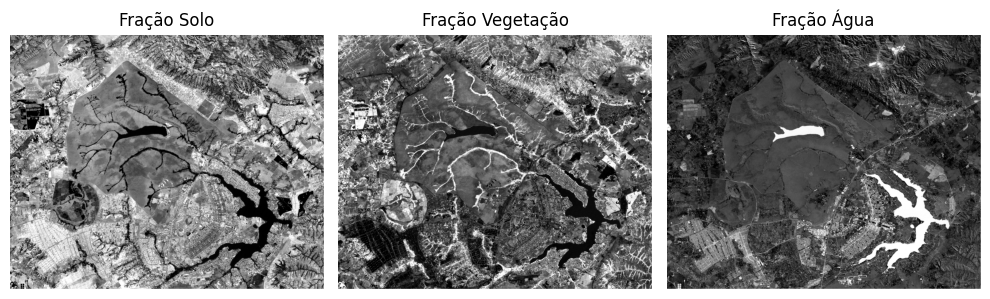

In [9]:
# Visualizando bandas separadas
fig, axes = plt.subplots(1,3, figsize=(10, 8))
lista_nomes = ['Solo', 'Vegetação', 'Água']
axes = axes.ravel()

for i in range(frac.shape[2]):
  axes[i].imshow(stretch(frac[:,:,i]), cmap='gray')
  axes[i].set_title('Fração ' + lista_nomes[i])
  axes[i].axis('off')

plt.tight_layout()
plt.show()

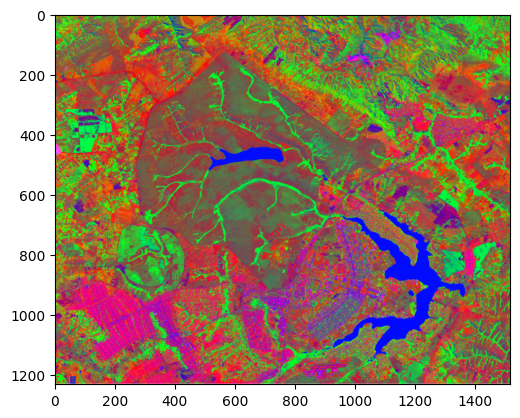

In [10]:
# Composição colorida
imshow(frac, stretch = (0.02,0.98))
plt.show()